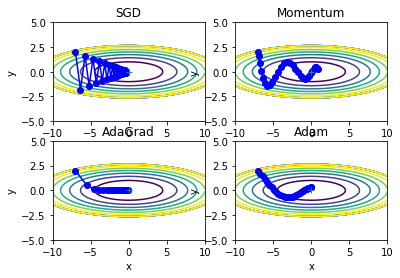

In [13]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

def f(x,y):
    return x**2/20.0 + y**2

def df(x,y):
    return x/10.0, 2.0*y

init_pos = (-7.0,2.0)
params = {}
params['x'],params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'],grads['y'] = 0,0

optimizers = OrderedDict()
optimizers['SGD'] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers['Adam'] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'],params['y'])
        optimizer.update(params,grads)
        
    x = np.arange(-10,10,0.01)
    y = np.arange(-5,5,0.01)
    
    X,Y = np.meshgrid(x,y)
    Z = f(X,Y)
    
    mask = Z > 7
    Z[mask] = 0
    
    plt.subplot(2,2,idx)
    idx += 1
    plt.plot(x_history,y_history,'o-',color ='blue')
    plt.contour(X,Y,Z)
    plt.ylim=(-10,10)
    plt.xlim=(-10,10)
    plt.plot(0,0,'+')
    plt.title(key)
    plt.xlabel('x')
    plt.ylabel('y')
    
plt.show()
    
    

==========1/16===========
epoch:0 | 0.116 - 0.117
epoch:1 | 0.117 - 0.14
epoch:2 | 0.117 - 0.15
epoch:3 | 0.117 - 0.165
epoch:4 | 0.117 - 0.19
epoch:5 | 0.117 - 0.206
epoch:6 | 0.117 - 0.23
epoch:7 | 0.117 - 0.245
epoch:8 | 0.117 - 0.267
epoch:9 | 0.117 - 0.297
epoch:10 | 0.117 - 0.321
epoch:11 | 0.117 - 0.34
epoch:12 | 0.117 - 0.359
epoch:13 | 0.117 - 0.371
epoch:14 | 0.117 - 0.39
epoch:15 | 0.117 - 0.408
epoch:16 | 0.117 - 0.421
epoch:17 | 0.117 - 0.437
epoch:18 | 0.117 - 0.452
epoch:19 | 0.117 - 0.46


TypeError: 'tuple' object is not callable

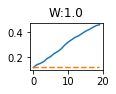

In [20]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import Adam,SGD

(x_train,t_train),(x_tets,t_test) = load_mnist(normalize=True)

x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size = 784,hidden_size_list = [100,100,100,100,100], output_size = 10,
                                    weight_init_std = weight_init_std,use_batchnorm=True)
    network = MultiLayerNetExtend(input_size = 784,hidden_size_list=[100,100,100,100,100], output_size = 10,
                                 weight_init_std = weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    bn_train_acc_list = []
    train_acc_list = []
    
    iter_per_epoch = max(train_size/batch_size,1)
    epoch_cnt = 0
    
    for i in range(100000000):
        batch_mask = np.random.choice(train_size,batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
        
        for _network in (bn_network,network):
            grads = _network.gradient(x_train,t_train)
            optimizer.update(_network.params,grads)
            
        if i% iter_per_epoch == 0:
            train_acc = network.accuracy(x_train,t_train)
            bn_train_acc = bn_network.accuracy(x_train,t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            
            print('epoch:'+str(epoch_cnt) + " | "+str(train_acc) + " - "+str(bn_train_acc))
            
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
    return train_acc_list, bn_train_acc_list

weight_scale_list = np.logspace(0,-4,num = 16)
x = np.arange(max_epochs)

for i,w in enumerate(weight_scale_list):
    print('=========='+str(i+1)+'/16===========')
    train_acc_list,bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:"+str(w))
    if i == 15:
        plt.plot(x,bn_train_acc_list,label="Batch Normalization",markevery = 2)
        plt.plot(x,train_acc_list,linestyle = "--",label= 'Normal(without BatchNorm)',markevery= 2)
    else:
        plt.plot(x,bn_train_acc_list,markevery=2)
        plt.plot(x,train_acc_list,linestyle="--",markevery=2)
        
    plt.ylim(0,1.0)
    if i%4:
        plt.yticks([])

    else:
        plt.xlabel('epochs')
    plt.legend(loc='lower right')

plt.show()